In [104]:
import pandas as pd
import torch
import torch.nn as nn
import seaborn as sns
import numpy as np
import time
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score

## Subir datasets de dígitos (train)

In [2]:
from google.colab import files
uploaded = files.upload()  # 1_digits_train.txt
!ls

Saving 1_digits_train.txt to 1_digits_train.txt
1_digits_train.txt  sample_data


In [3]:
from google.colab import files
uploaded = files.upload()  # 1_digits_test.txt
!ls

Saving 1_digits_test.txt to 1_digits_test.txt
1_digits_test.txt  1_digits_train.txt  sample_data


## Leer dataset de dígitos

In [4]:
column_names = ["feat" + str(i) for i in range(64)]
column_names.append("class")

In [5]:
df_train_val = pd.read_csv('1_digits_train.txt', names = column_names)
df_train_val

,feat0,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,...,feat55,feat56,feat57,feat58,feat59,feat60,feat61,feat62,feat63,class
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4342,0,0,9,11,0,0,0,0,0,7,...,0,0,0,8,12,12,15,10,0,2
4343,0,0,6,15,2,0,0,0,0,0,...,0,0,0,7,16,16,10,1,0,6
4344,0,0,15,16,16,14,0,0,0,0,...,0,0,0,14,11,0,0,0,0,7
4345,0,0,0,1,15,11,0,0,0,0,...,0,0,0,0,1,16,10,0,0,4


In [6]:
df_test = pd.read_csv('1_digits_test.txt', names = column_names)
df_test

,feat0,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,...,feat55,feat56,feat57,feat58,feat59,feat60,feat61,feat62,feat63,class
0,0,0,13,12,10,12,8,0,0,2,...,0,0,0,10,16,16,8,0,0,5
1,0,0,8,16,14,4,0,0,0,5,...,0,0,0,10,16,14,12,2,0,9
2,0,0,0,7,16,0,0,0,0,0,...,0,0,0,0,9,15,1,0,0,4
3,0,0,2,14,9,2,0,0,0,0,...,0,0,0,2,14,14,2,0,0,0
4,0,1,16,16,15,3,0,0,0,0,...,0,0,0,16,6,0,0,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1267,0,0,5,13,11,2,0,0,0,2,...,0,0,0,8,13,15,10,1,0,9
1268,0,0,0,1,12,1,0,0,0,0,...,0,0,0,0,4,9,0,0,0,4
1269,0,0,3,15,0,0,0,0,0,0,...,0,0,0,4,14,16,9,0,0,6
1270,0,0,6,16,2,0,0,0,0,0,...,0,0,0,5,16,16,16,5,0,6


In [7]:
df_train, df_val = train_test_split(df_train_val, test_size = 0.3, random_state = 10)

In [8]:
scaler = StandardScaler().fit(df_train.iloc[:,0:64])
df_train.iloc[:,0:64] = scaler.transform(df_train.iloc[:,0:64])
df_val.iloc[:,0:64] = scaler.transform(df_val.iloc[:,0:64])
df_test.iloc[:,0:64] = scaler.transform(df_test.iloc[:,0:64])

<ipython-input-8-9f48500b620a>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_train.iloc[:,0:64] = scaler.transform(df_train.iloc[:,0:64])
<ipython-input-8-9f48500b620a>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_val.iloc[:,0:64] = scaler.transform(df_val.iloc[:,0:64])
<ipython-input-8-9f48500b620a>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns

In [9]:
df_train

,feat0,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,...,feat55,feat56,feat57,feat58,feat59,feat60,feat61,feat62,feat63,class
4026,0.0,-0.338570,0.797238,0.535297,-0.599203,-1.007598,-0.412556,-0.13043,-0.045374,1.329217,...,-0.206188,0.0,-0.302452,0.078492,-0.427291,0.468026,1.548367,0.696964,-0.186744,9
1548,0.0,-0.338570,-0.269346,0.999221,0.985819,0.594099,-0.412556,-0.13043,-0.045374,-0.619760,...,-0.206188,0.0,-0.302452,-0.121990,0.248408,0.876852,1.378118,-0.527715,-0.186744,3
1709,0.0,-0.338570,-0.482663,0.535297,0.759387,0.594099,-0.412556,-0.13043,-0.045374,-0.619760,...,-0.206188,0.0,-0.302452,-0.723436,-0.427291,0.876852,1.548367,-0.037843,-0.186744,1
2195,0.0,2.026364,1.863823,-0.392551,-2.410657,-1.007598,-0.412556,-0.13043,-0.045374,1.329217,...,-0.206188,0.0,1.890776,1.481867,-0.652523,-0.758451,0.356618,1.186836,-0.186744,2
1216,0.0,2.026364,0.797238,0.767259,0.985819,1.661897,0.191388,-0.13043,-0.045374,2.953365,...,-0.206188,0.0,-0.302452,1.281385,0.924106,0.672439,0.356618,-0.282779,-0.186744,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009,0.0,-0.338570,-1.122613,-2.248248,-0.599203,1.839863,0.493359,-0.13043,-0.045374,-0.619760,...,-0.206188,0.0,-0.302452,-1.124400,-2.679617,0.468026,-0.664881,-0.527715,-0.186744,9
1180,0.0,0.843897,0.583922,-0.392551,0.532956,0.772065,-0.412556,-0.13043,-0.045374,3.278195,...,-0.206188,0.0,-0.302452,1.281385,0.924106,0.468026,0.867368,0.452028,-0.186744,3
3441,0.0,-0.338570,-0.269346,-0.160589,0.985819,0.950031,-0.110584,-0.13043,-0.045374,0.354728,...,-0.206188,0.0,-0.302452,0.078492,0.473640,-2.393755,-1.175631,-0.527715,-0.186744,9
1344,0.0,-0.338570,1.223872,0.999221,0.985819,0.238166,-0.412556,-0.13043,-0.045374,0.029899,...,0.911859,0.0,-0.302452,0.880421,0.924106,0.876852,1.548367,3.391260,6.008192,2


#Crear Modelo


In [120]:
model = nn.Sequential(
          nn.Linear(64, 40),
          nn.ReLU(),
          nn.Linear(40,10),
        )

In [121]:
device = torch.device('cuda')

model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

## Crear datasets y dataloaders para pytorch (train)

In [122]:
# Crear datasets
feats_train = df_train.to_numpy()[:,0:64].astype(np.float32)
labels_train = df_train.to_numpy()[:,64].astype(int)
dataset_train = [ {"features":feats_train[i,:], "labels":labels_train[i]} for i in range(feats_train.shape[0]) ]

feats_val = df_val.to_numpy()[:,0:64].astype(np.float32)
labels_val = df_val.to_numpy()[:,64].astype(int)
dataset_val = [ {"features":feats_val[i,:], "labels":labels_val[i]} for i in range(feats_val.shape[0]) ]

feats_test = df_test.to_numpy()[:,0:64].astype(np.float32)
labels_test = df_test.to_numpy()[:,64].astype(int)
dataset_test = [ {"features":feats_test[i,:], "labels":labels_test[i]} for i in range(feats_test.shape[0]) ]

In [123]:
# Crear dataloaders
dataloader_train = torch.utils.data.DataLoader(dataset_train, batch_size=128, shuffle=True, num_workers=0)
dataloader_val = torch.utils.data.DataLoader(dataset_val, batch_size=128, shuffle=True, num_workers=0)
dataloader_test = torch.utils.data.DataLoader(dataset_test, batch_size=128, shuffle=True, num_workers=0)

#Entrenamiento


In [124]:
# Variables para el Early Stopping
best_val_loss = float('inf') # Inicializamos la mejor pérdida de validación con infinito positivo
patience = 100 # Número de épocas sin mejora antes de detener el entrenamiento
counter = 0 # Contador para llevar el registro de las épocas sin mejora

start = time.time()  # Registramos el tiempo del entrenamiento

# Guardar resultados del loss y épocas que duró el entrenamiento
loss_train = []
loss_val = []
epochs = []

# Entrenamiento de la red por n épocas
for epoch in range(250):
    # Guardar loss de cada batch
    loss_train_batches = []
    loss_val_batches = []

    # Entrenamiento --------------------------------------------------------------
    model.train()
    # Debemos recorrer cada batch (lote de los datos)
    for i, data in enumerate(dataloader_train, 0):
        # Procesar batch actual
        inputs = data["features"].to(device)  # Características
        labels = data["labels"].to(device)  # Clases
        # zero the parameter gradients
        optimizer.zero_grad()
        # forward + backward + optimize
        outputs = model(inputs)  # Predicciones
        loss = criterion(outputs, labels)  # Loss de entrenamiento
        loss.backward()  # Backpropagation
        optimizer.step()

        # Guardamos la pérdida de entrenamiento en el batch actual
        loss_train_batches.append(loss.item())

    # Guardamos el loss de entrenamiento de la época actual
    loss_train.append(np.mean(loss_train_batches))  # Loss promedio de los batches

    # Predicción en conjunto de validación ---------------------------------------
    model.eval()
    with torch.no_grad():
        # Iteramos dataloader_val para evaluar el modelo en los datos de validación
        for i, data in enumerate(dataloader_val, 0):
            # Procesar batch actual
            inputs = data["features"].to(device)  # Características
            labels = data["labels"].to(device)  # Clases

            outputs = model(inputs)  # Obtenemos predicciones

            # Guardamos la pérdida de validación en el batch actual
            loss = criterion(outputs, labels)
            loss_val_batches.append(loss.item())

    # Guardamos el Loss de validación de la época actual
    loss_val.append(np.mean(loss_val_batches))  # Loss promedio de los batches

    # Guardamos la época
    epochs.append(epoch)

    # Imprimir la pérdida de entrenamiento/validación en la época actual
    print(("Epoch: %d, train loss: %.4f, val loss: %.4f" % (epoch, loss_train[epoch], loss_val[epoch])))

    # Comprobar si la pérdida en el conjunto de validación ha mejorado
    if loss_val[-1] < best_val_loss:
        best_val_loss = loss_val[-1]
        counter = 0  # Restablecer el contador si hay mejora
    else:
        counter += 1  # Incrementar el contador si no hay mejora

    # Detener el entrenamiento si no hay mejora durante "patience" épocas consecutivas
    if counter >= patience:
        print("Deteniendo el entrenamiento debido a la falta de mejora en el conjunto de validación.")
        break

end = time.time()
print('Finished Training, total time %f seconds' % (end - start))


Epoch: 0, train loss: 2.1387, val loss: 1.9292
Epoch: 1, train loss: 1.7180, val loss: 1.5100
Epoch: 2, train loss: 1.2956, val loss: 1.0937
Epoch: 3, train loss: 0.9292, val loss: 0.7715
Epoch: 4, train loss: 0.6638, val loss: 0.5544
Epoch: 5, train loss: 0.4874, val loss: 0.4325
Epoch: 6, train loss: 0.3774, val loss: 0.3562
Epoch: 7, train loss: 0.3071, val loss: 0.3019
Epoch: 8, train loss: 0.2589, val loss: 0.2544
Epoch: 9, train loss: 0.2254, val loss: 0.2220
Epoch: 10, train loss: 0.1999, val loss: 0.2052
Epoch: 11, train loss: 0.1799, val loss: 0.2008
Epoch: 12, train loss: 0.1642, val loss: 0.1709
Epoch: 13, train loss: 0.1498, val loss: 0.1650
Epoch: 14, train loss: 0.1386, val loss: 0.1753
Epoch: 15, train loss: 0.1289, val loss: 0.1617
Epoch: 16, train loss: 0.1199, val loss: 0.1368
Epoch: 17, train loss: 0.1131, val loss: 0.1366
Epoch: 18, train loss: 0.1053, val loss: 0.1331
Epoch: 19, train loss: 0.0999, val loss: 0.1291
Epoch: 20, train loss: 0.0942, val loss: 0.1265
Ep

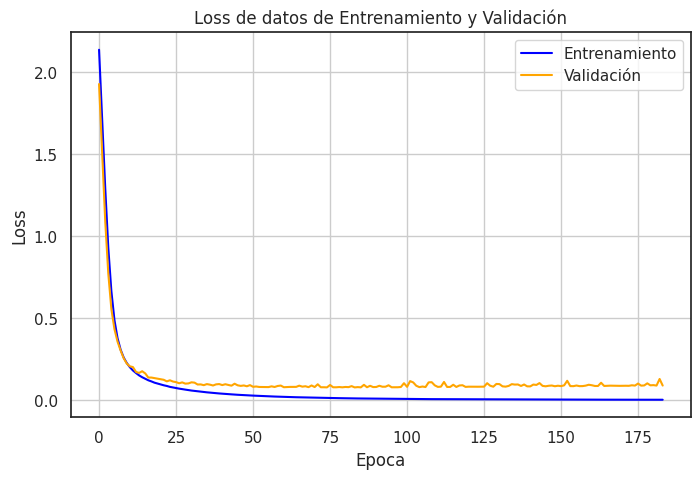

In [125]:
import matplotlib.pyplot as plt

# Graficar loss de entrenamiento y validación
plt.figure(figsize = (8, 5))
plt.title('Loss de datos de Entrenamiento y Validación')
plt.xlabel('Epoca')
plt.ylabel('Loss')
plt.plot(epochs, loss_train, 'blue', label = 'Entrenamiento')
plt.plot(epochs, loss_val, 'orange', label = 'Validación')
plt.grid()
plt.legend()

Accuracy Normalizado en el Conjunto de Entrenamiento: 100.00%
Accuracy Normalizado en el Conjunto de Validación: 97.49%


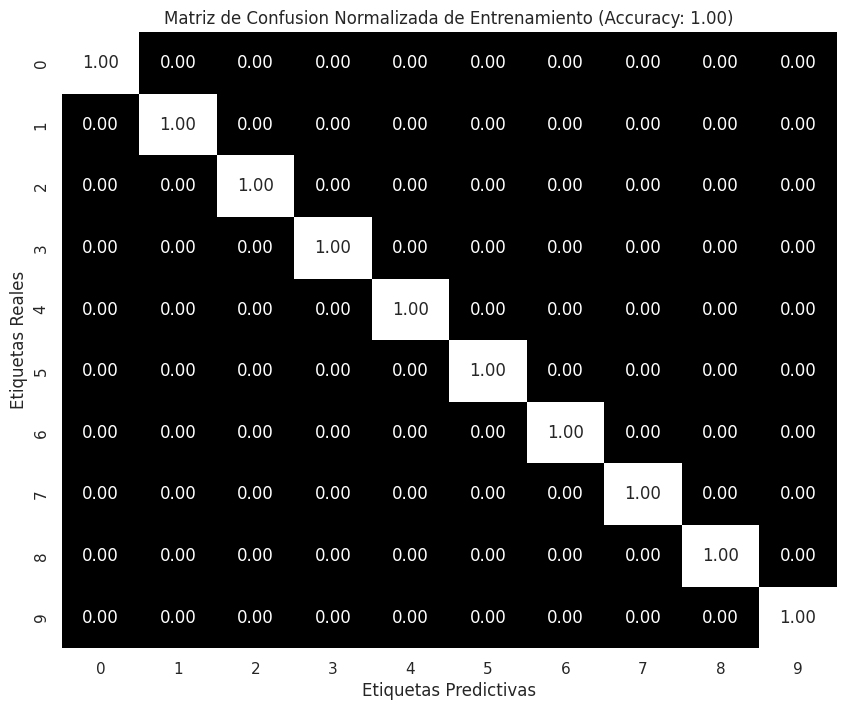

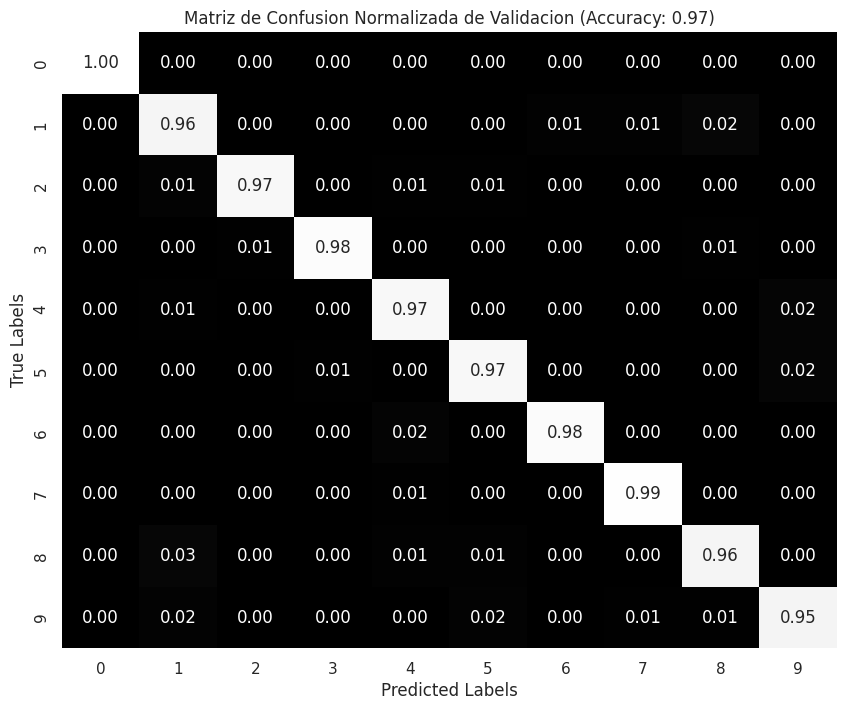

In [126]:
# Calcular accuracy normalizado en el conjunto de entrenamiento
model.eval()
predicted_train_labels = []
true_train_labels = []

with torch.no_grad():
    for i, data in enumerate(dataloader_train, 0):
        inputs = data["features"].to(device)
        labels = data["labels"].to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)

        predicted_train_labels.extend(predicted.cpu().numpy())
        true_train_labels.extend(labels.cpu().numpy())

accuracy_train = precision_score(true_train_labels, predicted_train_labels, average='weighted')
print('Accuracy Normalizado en el Conjunto de Entrenamiento: {:.2f}%'.format(100 * accuracy_train))

# Calcular matriz de confusión normalizada en el conjunto de entrenamiento
confusion_train = confusion_matrix(true_train_labels, predicted_train_labels, normalize='true')

# Calcular accuracy normalizado en el conjunto de validación
model.eval()
predicted_val_labels = []
true_val_labels = []

with torch.no_grad():
    for i, data in enumerate(dataloader_val, 0):
        inputs = data["features"].to(device)
        labels = data["labels"].to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)

        predicted_val_labels.extend(predicted.cpu().numpy())
        true_val_labels.extend(labels.cpu().numpy())

accuracy_val = precision_score(true_val_labels, predicted_val_labels, average='weighted')
print('Accuracy Normalizado en el Conjunto de Validación: {:.2f}%'.format(100 * accuracy_val))

# Obtenemos la matriz de confusión normalizada para el conjunto de entrenamiento

# Configuramos el estilo de seaborn para tonos de gris
sns.set(style="white")

# Calculamos el accuracy
accuracy_val_ = np.trace(confusion_matrix(true_train_labels, predicted_train_labels)) / float(np.sum(confusion_matrix(true_train_labels, predicted_train_labels)))

# Creamos un mapa de calor con tonos de gris según el accuracy
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(true_train_labels, predicted_train_labels, normalize='true'), annot=True, cmap='gray', fmt=".2f", cbar=False)

# Configuramos etiquetas y títulos
plt.xlabel("Etiquetas Predictivas")
plt.ylabel("Etiquetas Reales")
plt.title("Matriz de Confusion Normalizada de Entrenamiento (Accuracy: {:.2f})".format(accuracy_val_))

# Mostramos el mapa de calor
plt.show()

#Repetimos para la matriz de confusion normalizada del conjunto de validacion

# Calculamos matriz de confusión normalizada en el conjunto de validación
confusion_val = confusion_matrix(true_val_labels, predicted_val_labels, normalize='true')

# Creamos el mapa de calor con tonos de gris según el accuracy
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(true_val_labels, predicted_val_labels, normalize='true'), annot=True, cmap='gray', fmt=".2f", cbar=False)

# Configuramos etiquetas y títulos
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Matriz de Confusion Normalizada de Validacion (Accuracy: {:.2f})".format(accuracy_val))

# Mostramos el mapa de calor
plt.show()


